In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [2]:
def init_spark():
    spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()
    return spark
spark_object = init_spark()

23/03/29 19:52:22 WARN Utils: Your hostname, karyubuntu resolves to a loopback address: 127.0.1.1; using 172.31.170.192 instead (on interface wlp0s20f3)
23/03/29 19:52:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/29 19:52:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
train_spark = spark_object.read.option("delimiter", ",").csv("./data/trainbalanced.csv", header='true', inferSchema='true')
test_spark = spark_object.read.option("delimiter", ",").csv("./data/testbalanced.csv", header='true', inferSchema='true')

In [4]:
for i in train_spark.columns:
    oldname = i
    if "." in oldname:
        newname = oldname.replace(".","")
        train_spark = train_spark.withColumnRenamed(oldname, newname)
        test_spark = test_spark.withColumnRenamed(oldname, newname)

In [6]:
input_list =[]
for i in train_spark.columns:
    if i != 'isFraud':
        input_list.append(i)

In [7]:
assembler = VectorAssembler(inputCols=input_list,outputCol='features')

In [8]:
train_features = assembler.transform(train_spark)
test_features = assembler.transform(test_spark)

In [9]:
dt_models = []
max_depths = [5, 10, 12]
for md in max_depths:
    print("-"*25)
    print("Depth: " + str(md))
    dt = DecisionTreeClassifier(featuresCol='features', labelCol='isFraud', maxDepth=md)
    model = dt.fit(train_features)
    predictions = model.transform(train_features)
    y_train_pred=predictions.select("prediction").collect()
    y_train_orig=predictions.select("isFraud").collect()
    print('Training Report')
    print(classification_report(y_train_orig, y_train_pred))

    predictions = model.transform(test_features)
    y_test_pred=predictions.select("prediction").collect()
    y_test_orig=predictions.select("isFraud").collect()
    print('Test Report')
    print(classification_report(y_test_orig, y_test_pred))
    dt_models.append(model)

-------------------------
Depth: 5


23/03/29 19:52:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Training Report
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     93062
         1.0       0.93      0.94      0.93     93062

    accuracy                           0.93    186124
   macro avg       0.93      0.93      0.93    186124
weighted avg       0.93      0.93      0.93    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     39853
         1.0       0.43      0.67      0.52      3417

    accuracy                           0.90     43270
   macro avg       0.70      0.80      0.73     43270
weighted avg       0.93      0.90      0.91     43270

-------------------------
Depth: 10


Training Report
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     93062
         1.0       0.97      0.96      0.96     93062

    accuracy                           0.96    186124
   macro avg       0.96      0.96      0.96    186124
weighted avg       0.96      0.96      0.96    186124

Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     39853
         1.0       0.61      0.63      0.62      3417

    accuracy                           0.94     43270
   macro avg       0.79      0.80      0.79     43270
weighted avg       0.94      0.94      0.94     43270

-------------------------
Depth: 12


Training Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     93062
         1.0       0.98      0.97      0.97     93062

    accuracy                           0.97    186124
   macro avg       0.97      0.97      0.97    186124
weighted avg       0.97      0.97      0.97    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     39853
         1.0       0.65      0.64      0.65      3417

    accuracy                           0.94     43270
   macro avg       0.81      0.81      0.81     43270
weighted avg       0.94      0.94      0.94     43270



Text(0.5, 1.0, 'Class - Legitimate Transection')

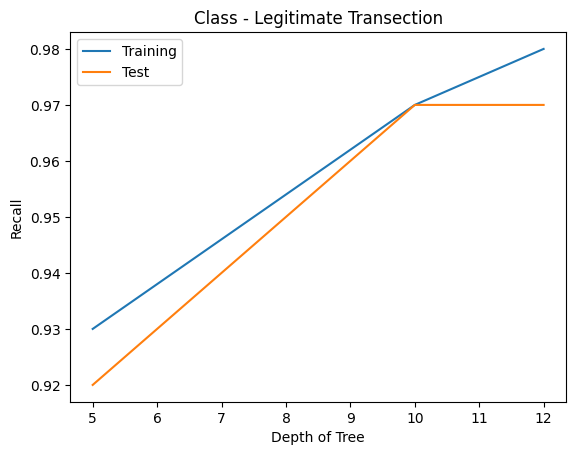

In [3]:
x = [5, 10,12]
y_train = [0.93, 0.97, 0.98]
y_test = [0.92, 0.97, 0.97]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Recall')
plt.title('Class - Legitimate Transection')

Text(0.5, 1.0, 'Class - Fraud Transection')

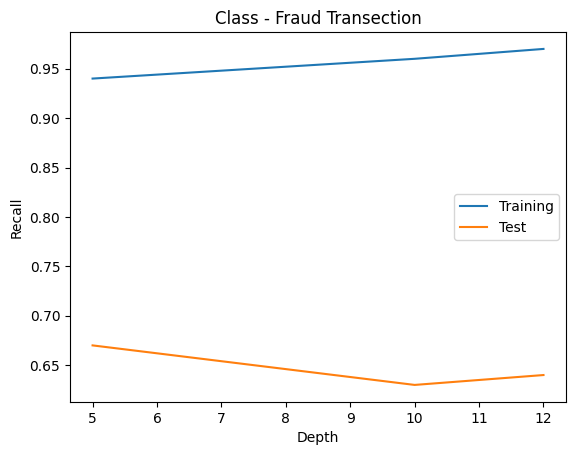

In [4]:
x = [5, 10,12]
y_train = [0.94, 0.96, 0.97]
y_test = [0.67, 0.63, 0.64]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Recall')
plt.title('Class - Fraud Transection')